In [1]:
import pandas as pd

In [2]:
!ls

8.1-text-generation-with-lstm.ipynb SeqListing_0.1.ipynb
Applications                        SeqListing_0.2.ipynb
Augmentation                        TFIDF0.1.ipynb
Augmentation1.ipynb                 TextClassification.ipynb
Augmentation2.ipynb                 US008080243.json
AugmentationDataset.ipynb           US008080243B2.txt
AugmentationDatasetYesNo.ipynb      US08828405.xml
CombineAug.ipynb                    US10023654.json
Creative Cloud Files                US20100068199A1.txt
DTP_01_03_2021 Dropbox              US8080243.pdf
Desktop                             US8426363.json
Documents                           US8563698.json
Downloads                           US8829165.json
Dropbox                             US8829165B2.xml
Dropbox (Personal)                  US8829165B2SL.xml
LSTMpatents.ipynb                   US8859741.json
Lab8Materials                       US8892165.txt
Library                             US9574011.json
Movies                              XMLtoDict_0

In [3]:
df = pd.read_csv("augDataSetYesNo.csv", header = None)

In [4]:
df.columns = ['sentence','label']

In [5]:
print(df.iloc[0])

sentence    An isolated monoclonal antibody that binds to ...
label                                                       1
Name: 0, dtype: object


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
sentences = df['sentence'].values
y = df['label'].values

In [55]:
sentences_train, sentences_test, y_train, y_test = train_test_split(
...    sentences, y, test_size=0.3, random_state=1000)

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

In [57]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<4942x17826 sparse matrix of type '<class 'numpy.int64'>'
	with 178886 stored elements in Compressed Sparse Row format>

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

In [60]:
print("Accuracy:", score)

Accuracy: 0.9985842378480415


In [61]:
from keras.models import Sequential
from keras import layers

In [62]:
input_dim = X_train.shape[1]

In [63]:
input_dim

17826

In [64]:
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [65]:
model.compile(loss='binary_crossentropy', 
...               optimizer='adam', 
...               metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                178270    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 178,281
Trainable params: 178,281
Non-trainable params: 0
_________________________________________________________________


In [66]:
history = model.fit(X_train, y_train, epochs=100, verbose=False, validation_data=(X_test, y_test), batch_size=10)

In [67]:
from keras.backend import clear_session

In [68]:
clear_session()

In [69]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.9821


In [70]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [71]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

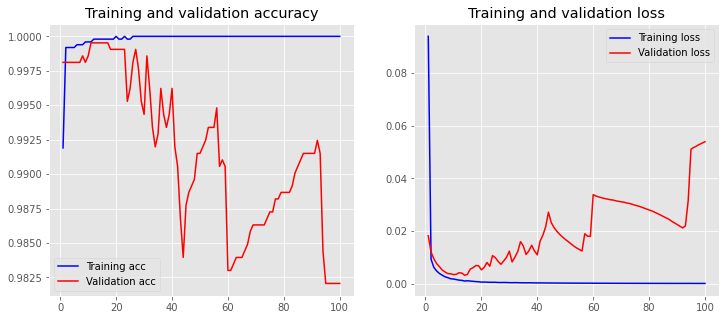

In [72]:
plot_history(history)

In [73]:
from keras.preprocessing.text import Tokenizer

In [74]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(sentences_train[2])
print(X_train[2])

The invention claimed is: A monoclonal antibNoJdy th!at specifically biLnds the K2 domain (Kunitz domain 2) of TFPxI, Gwhqerein qsaid anfti4body specifically bitnds an epitope Pcoomprqising ErYesidues E10, E11, D12, P13, R17, Y19, T21, Y23, F24, N26, Q28, Q31, C32, E33, R34, K36, and L50 of SEQ ID NO: 2.
[1, 75, 88, 15, 7, 14, 695, 12, 50, 1, 116, 41, 157, 41, 30, 2, 50, 3529, 5, 44, 115, 112, 114, 109, 99, 113, 110, 106, 104, 107, 100, 96, 95, 97, 101, 103, 6, 98, 2, 10, 9, 8, 30]


In [76]:
from keras.preprocessing.sequence import pad_sequences

In [77]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[0, :])

[ 331    5   34   14    4   19   52   54    3   11   45   14    4   24
    3   12   16   31  628   47   69    1   21   67 1760   82   42   33
 1761   93   92   64    2   10  229    9 1113    8   28    6   19   45
   14    4  367   74   20   68   11    6    5   71   41    2   39   46
   81    1  323   73    2 2198   77   56   80    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [78]:
from keras.models import Sequential
from keras import layers

In [79]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           913850    
_________________________________________________________________
flatten (Flatten)            (None, 5000)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                50010     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 963,871
Trainable params: 963,871
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  1.0000


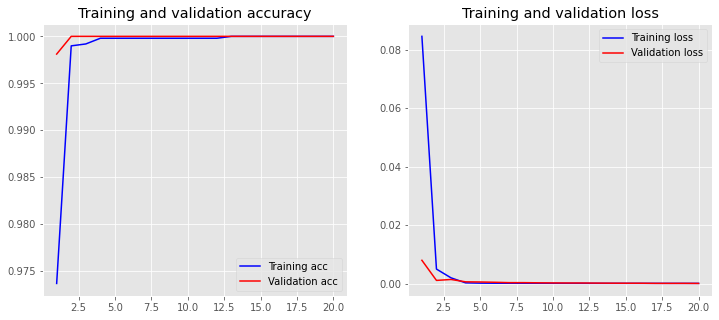

In [80]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [81]:
from keras.models import Sequential
from keras import layers

In [82]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           913850    
_________________________________________________________________
global_max_pooling1d (Global (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 914,371
Trainable params: 914,371
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.9991


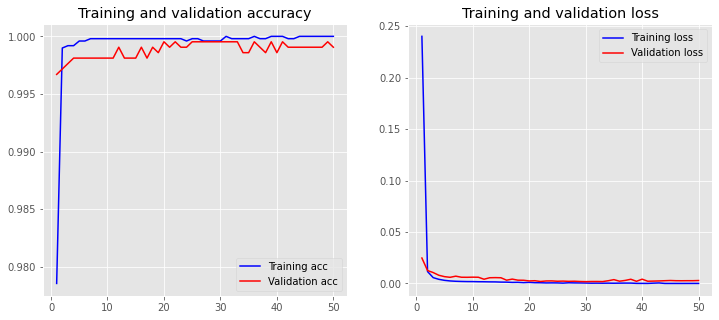

In [83]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [84]:
import numpy as np

In [85]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [90]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix('glove/glove.6B.50d.txt', tokenizer.word_index, embedding_dim)

In [91]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.38983421786945344

In [92]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=False))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           913850    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 914,371
Trainable params: 521
Non-trainable params: 913,850
_________________________________________________________________


Training Accuracy: 0.9895
Testing Accuracy:  0.9811


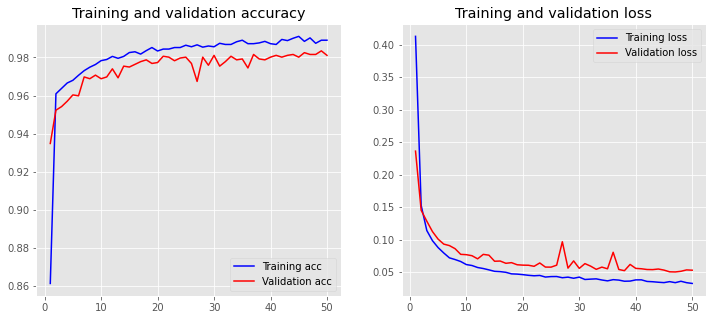

In [93]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [94]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 50)           913850    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 914,371
Trainable params: 914,371
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.9995


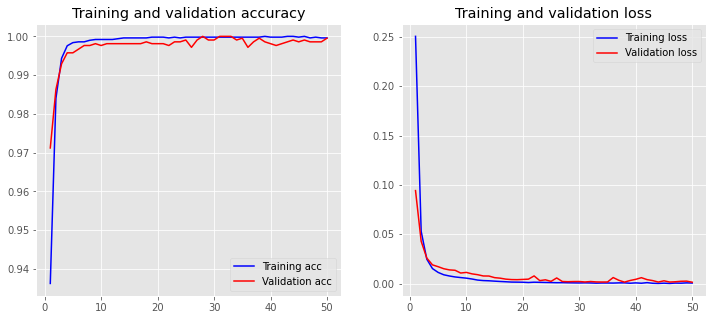

In [95]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [96]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1827700   
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 1,893,129
Trainable params: 1,893,129
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 0.9998
Testing Accuracy:  0.9953


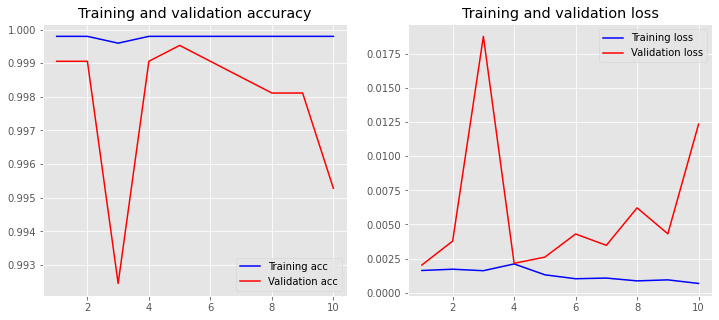

In [103]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [104]:
# save model and architecture to single file
model.save("modelClassification.h5")